In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

In [10]:
data=pd.read_csv('Car.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
data=data.drop(['car_ID'],axis=1)

In [12]:
data['CarName'] = data['CarName'].str.split(' ',expand=True)

ValueError: Columns must be same length as key

In [13]:
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [14]:
data['symboling']=data['symboling'].astype('str')

In [15]:
categorical_cols=data.select_dtypes(include=['object']).columns
data[categorical_cols].head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi


In [16]:
numerical_cols=data.select_dtypes(exclude=['object']).columns
data[numerical_cols].head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


In [17]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


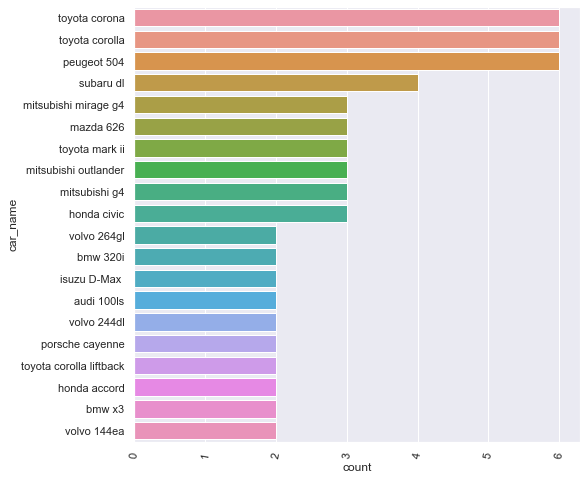

In [45]:
df=pd.DataFrame(data['CarName'].value_counts()).reset_index().rename(columns={'index':'car_name','CarName': 'count'}).head(20)
plot = sns.barplot(y='car_name',x='count',data=df)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

<Figure size 576x432 with 0 Axes>

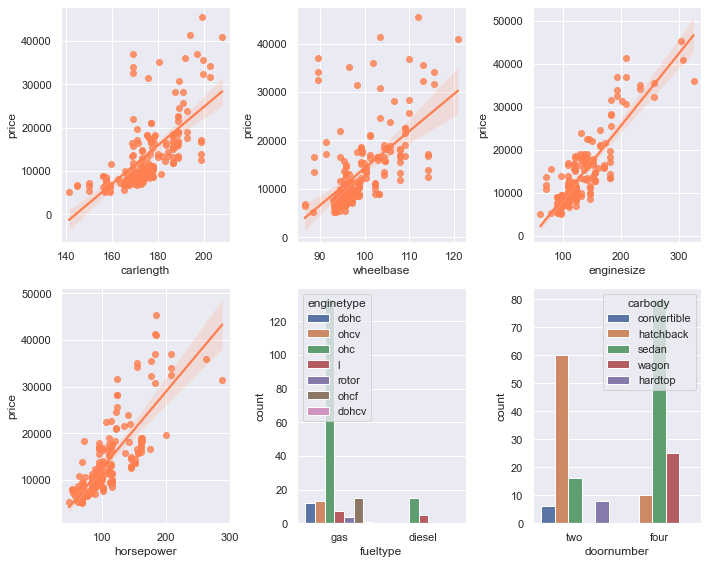

In [20]:
plt.figure(figsize=(8,6))
fig,ax = plt.subplots(2,3,figsize=(10,8))
sns.regplot(x = 'carlength', y = 'price',data= data,color='coral',ax=ax[0][0])
sns.regplot(x = 'wheelbase', y = 'price',data= data,color='coral',ax=ax[0][1])
sns.regplot(x = 'enginesize', y = 'price',data= data,color='coral',ax=ax[0][2])
sns.regplot(x = 'horsepower', y = 'price',data= data,color='coral',ax=ax[1][0])
sns.countplot(x='fueltype',hue = 'enginetype', data= data,ax=ax[1][1])
sns.countplot(x='doornumber',hue = 'carbody', data= data,ax=ax[1][2])

plt.tight_layout()
plt.show()

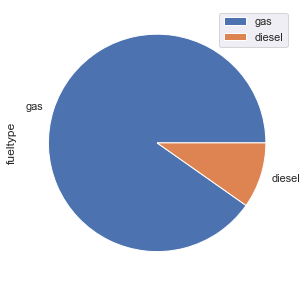

In [21]:
df=pd.DataFrame(data['fueltype'].value_counts())
plot = df.plot.pie(y='fueltype', figsize=(5, 5))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

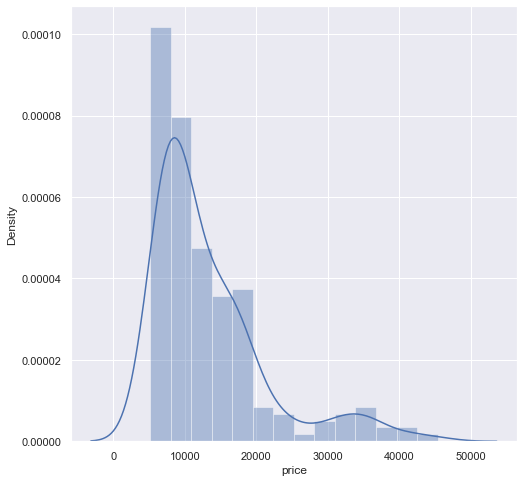

In [22]:
sns.distplot(data['price'],kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

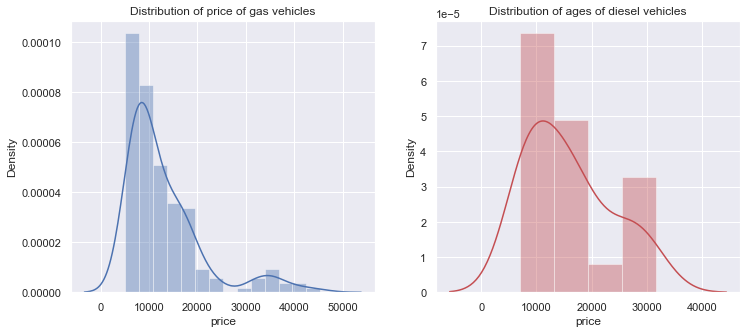

In [23]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.fueltype== 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(data[(data.fueltype == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

<AxesSubplot:xlabel='fueltype', ylabel='price'>

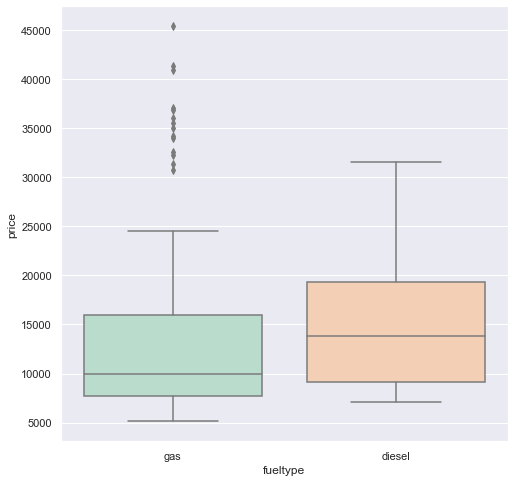

In [24]:
sns.boxplot(x = 'fueltype', y = 'price', data = data,palette='Pastel2')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price distribution of Std aspiration vehicles')

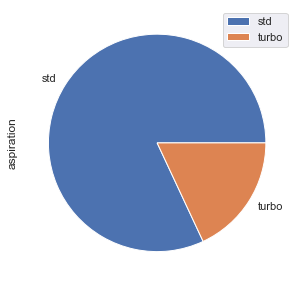

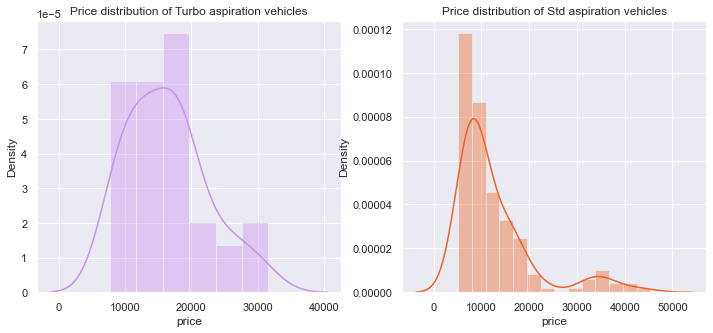

In [25]:
df=pd.DataFrame(data['aspiration'].value_counts())
plot = df.plot.pie(y='aspiration', figsize=(5, 5))

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(data[(data.aspiration== 'turbo')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of Turbo aspiration vehicles')

ax=f.add_subplot(122)
plot=sns.distplot(data[(data.aspiration == 'std')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of Std aspiration vehicles')



<AxesSubplot:xlabel='aspiration', ylabel='price'>

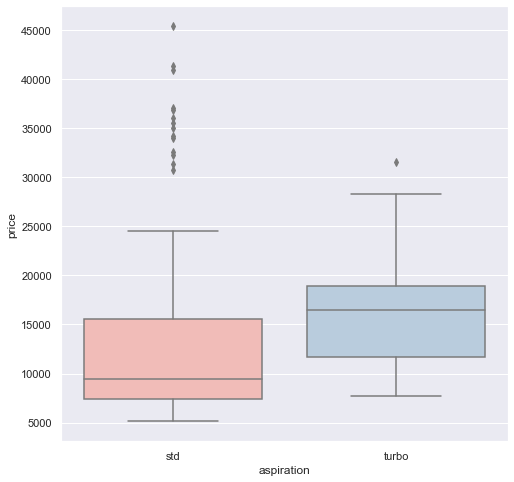

In [26]:
sns.boxplot(x = 'aspiration', y = 'price', data = data,palette='Pastel1')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price distribution of cars having four doors')

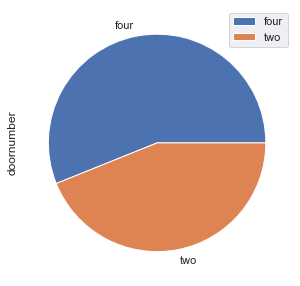

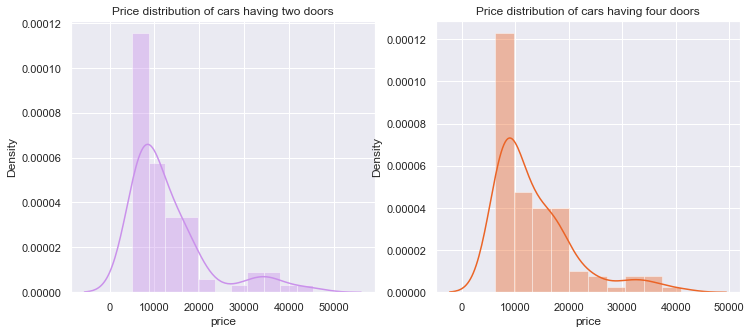

In [27]:
df=pd.DataFrame(data['doornumber'].value_counts())

plot = df.plot.pie(y='doornumber', figsize=(5, 5))

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(data[(data.doornumber== 'two')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of cars having two doors')

ax=f.add_subplot(122)
plot=sns.distplot(data[(data.doornumber == 'four')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of cars having four doors')

<AxesSubplot:xlabel='doornumber', ylabel='price'>

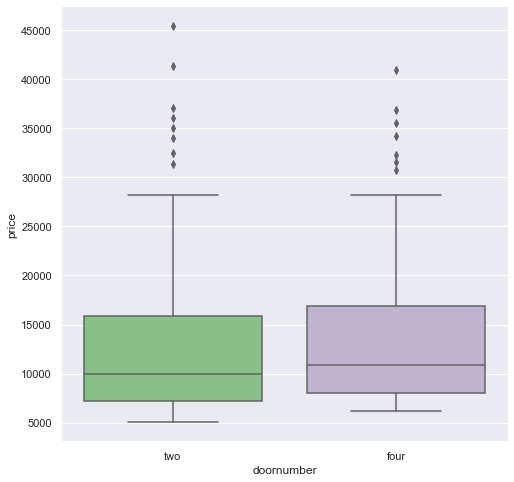

In [28]:
sns.boxplot(x = 'doornumber', y = 'price', data = data,palette='Accent')

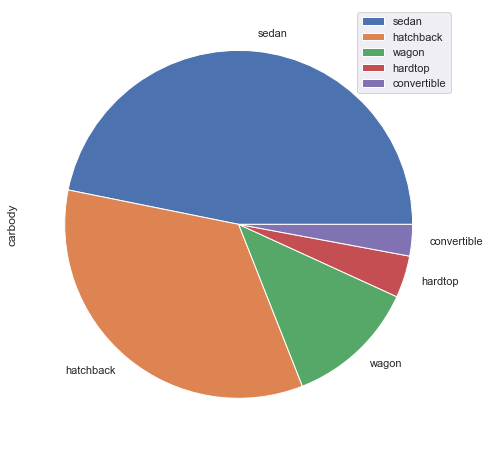

In [29]:
df=pd.DataFrame(data['carbody'].value_counts())

plot = df.plot.pie(y='carbody', figsize=(8, 8))

<AxesSubplot:xlabel='carbody', ylabel='price'>

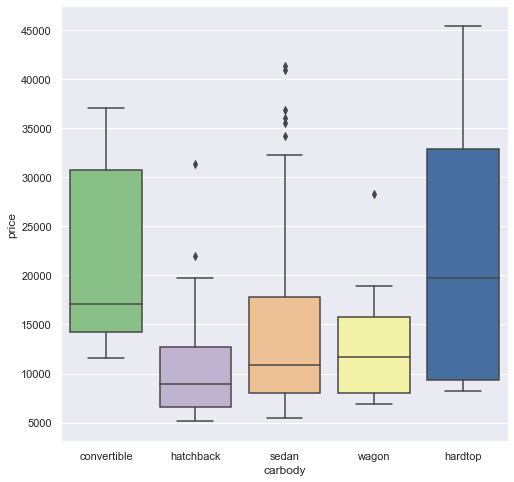

In [30]:
sns.boxplot(x = 'carbody', y = 'price', data = data,palette='Accent')

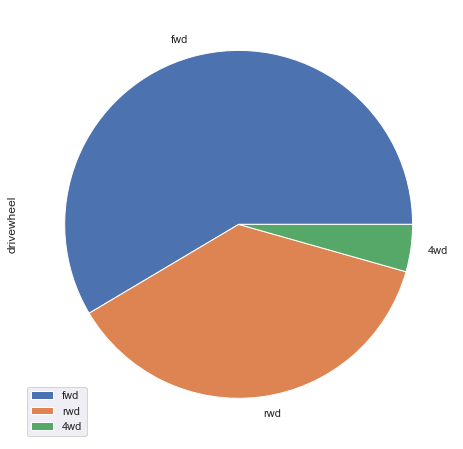

In [31]:
df=pd.DataFrame(data['drivewheel'].value_counts())

plot = df.plot.pie(y='drivewheel', figsize=(8, 8))
   

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

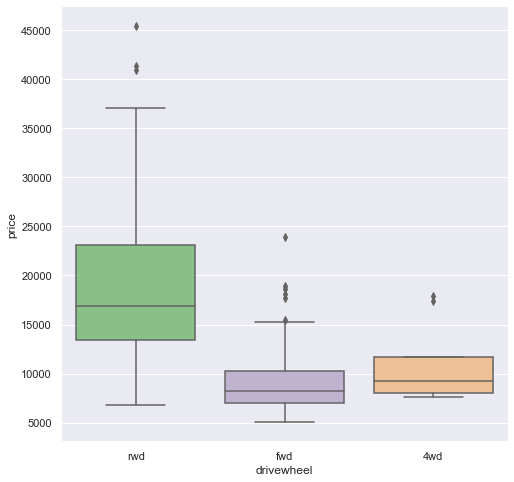

In [32]:
sns.boxplot(x = 'drivewheel', y = 'price', data = data,palette='Accent')

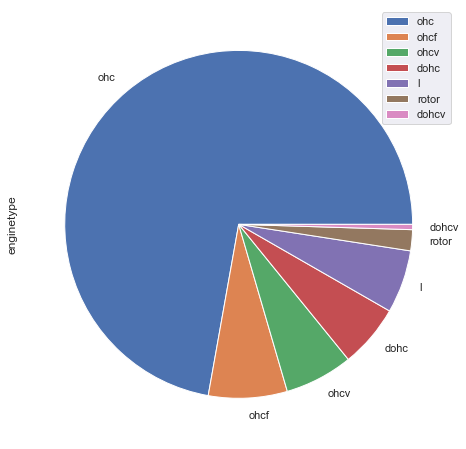

In [33]:
df=pd.DataFrame(data['enginetype'].value_counts())

plot = df.plot.pie(y='enginetype', figsize=(8, 8))


<AxesSubplot:xlabel='enginetype', ylabel='price'>

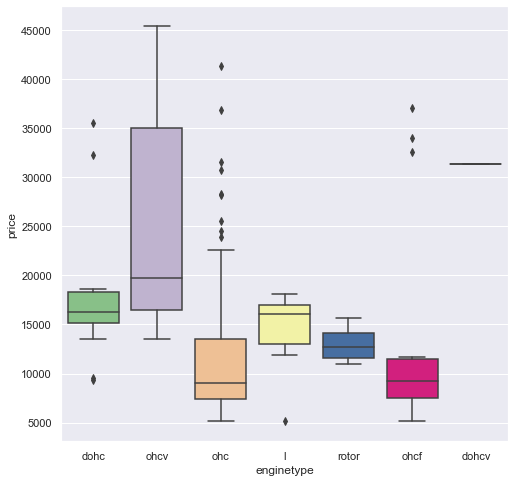

In [34]:
sns.boxplot(x = 'enginetype', y = 'price', data = data,palette='Accent')

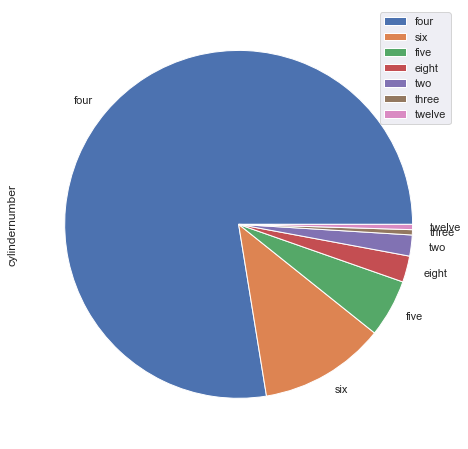

In [35]:
df=pd.DataFrame(data['cylindernumber'].value_counts())

plot = df.plot.pie(y='cylindernumber', figsize=(8, 8))



<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

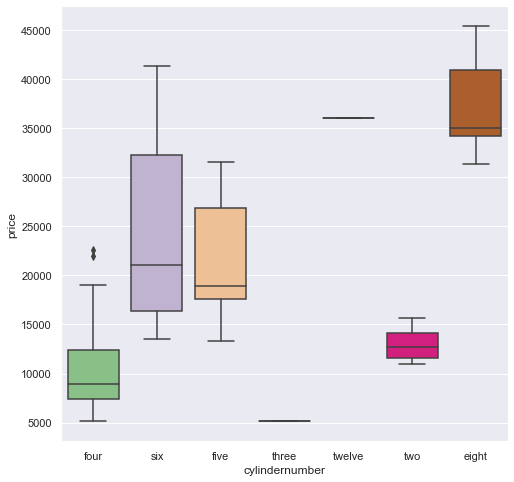

In [36]:
sns.boxplot(x = 'cylindernumber', y = 'price', data = data,palette='Accent')

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

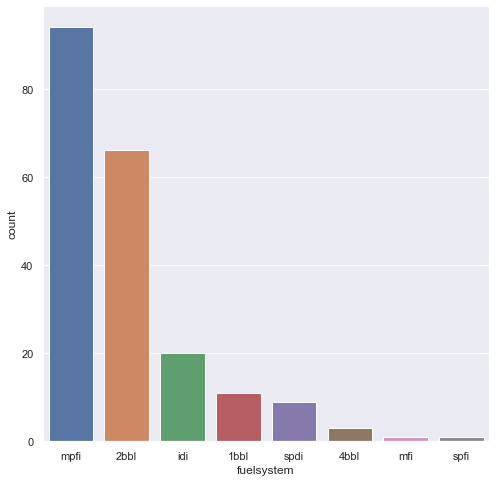

In [37]:
df=pd.DataFrame(data['fuelsystem'].value_counts()).reset_index().rename(columns={'index':'fuelsystem','fuelsystem':'count'})

sns.barplot(x='fuelsystem',y='count',data=df)


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

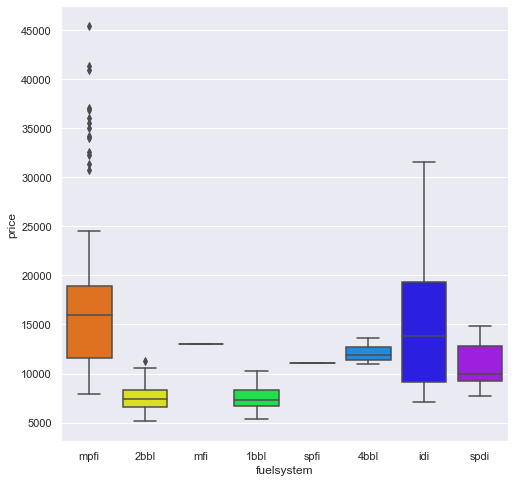

In [38]:
sns.boxplot(x = 'fuelsystem', y = 'price', data = data,palette='gist_rainbow')


In [39]:
At = (data.loc[data['enginelocation'] == 'rear'])
At

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


In [40]:
Cr1 = data.groupby('CarName')['enginesize'].max().reset_index()
Cr1 = Cr1.sort_values('enginesize', ascending= False)
Cr1

,CarName,enginesize
50,jaguar xk,326
18,buick century special,308
21,buick regal sport coupe (turbo),304
49,jaguar xj,258
48,jaguar xf,258
20,buick opel isuzu deluxe,234
23,buick skylark,234
12,bmw x3,209
14,bmw x5,209
13,bmw x4,209


In [41]:
Cr1 = data.groupby('CarName')['horsepower'].max().reset_index()
Cr1 = Cr1.sort_values('horsepower', ascending= False)
Cr1

,CarName,horsepower
97,porsche cayenne,288
50,jaguar xk,262
96,porsche boxter,207
95,porcshce panamera,207
75,nissan kicks,200
21,buick regal sport coupe (turbo),184
18,buick century special,184
12,bmw x3,182
14,bmw x5,182
13,bmw x4,182


In [42]:
Cr1 = data.groupby('CarName')['highwaympg'].max().reset_index()
Cr1 = Cr1.sort_values('highwaympg', ascending= False)
Cr1

,CarName,highwaympg
39,honda civic,54
24,chevrolet impala,53
73,nissan gt-r,50
115,toyota corolla,47
120,toyota corona,47
133,volkswagen model 111,46
129,vokswagen rabbit,46
46,isuzu D-Max V-Cross,43
26,chevrolet vega 2300,43
25,chevrolet monte carlo,43


In [43]:
Cr1 = data.groupby('CarName')['citympg'].max().reset_index()
Cr1 = Cr1.sort_values('citympg', ascending= False)
Cr1

,CarName,citympg
39,honda civic,49
24,chevrolet impala,47
73,nissan gt-r,45
120,toyota corona,38
25,chevrolet monte carlo,38
26,chevrolet vega 2300,38
115,toyota corolla,38
45,isuzu D-Max,38
46,isuzu D-Max V-Cross,38
35,dodge rampage,37


In [44]:
Cr1 = data.groupby('CarName')['price'].max().reset_index()
Cr1 = Cr1.sort_values('price', ascending= False)
Cr1

,CarName,price
21,buick regal sport coupe (turbo),45400.000
14,bmw x5,41315.000
18,buick century special,40960.000
96,porsche boxter,37028.000
12,bmw x3,36880.000
50,jaguar xk,36000.000
48,jaguar xf,35550.000
23,buick skylark,35056.000
20,buick opel isuzu deluxe,34184.000
97,porsche cayenne,34028.000
